<a href="https://colab.research.google.com/github/MutheRakesh19/Machine-Learning/blob/main/LinearRegression__pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the Libraries

In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/adult_eda.csv')

## check the data set head means top 5 rows

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Check the Last 5 rows

In [7]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## check Null values

In [8]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,802
marital-status,0
occupation,0
relationship,5068
race,0
sex,0


## Handiling the Missing value

In [9]:
education_num_median=df['education-num'].median()
df['education-num'].fillna(education_num_median,inplace=True)

In [10]:
relationship_mode=df['relationship'].mode()[0]
df['relationship'].fillna(relationship_mode,inplace=True)

In [11]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Describe

In [12]:
a=df.describe()
a

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080802,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.544279,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
relationship_mode=df['relationship'].mode()[0]
df['relationship'].fillna(relationship_mode,inplace=True)

In [34]:
# split the numerical variable nd categorical variables:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
categorical_cols = df.select_dtypes(include=['object'])

In [69]:
numerical_cols

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,77516.0,13.0,0.0,0.0,40.0
1,50.0,83311.0,13.0,0.0,0.0,13.0
2,38.0,215646.0,9.0,0.0,0.0,40.0
3,53.0,234721.0,7.0,0.0,0.0,40.0
4,28.0,338409.0,13.0,0.0,0.0,40.0
...,...,...,...,...,...,...
32556,27.0,257302.0,12.0,0.0,0.0,38.0
32557,40.0,154374.0,9.0,0.0,0.0,40.0
32558,58.0,151910.0,9.0,0.0,0.0,40.0
32559,22.0,201490.0,9.0,0.0,0.0,20.0


In [35]:
numerical_cols .isnull().T

,0,1,2,3,4,5,6,7,8,9,...,32551,32552,32553,32554,32555,32556,32557,32558,32559,32560
age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fnlwgt,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
education-num,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
capital-gain,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
capital-loss,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
hours-per-week,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
categorical_cols.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,32551,32552,32553,32554,32555,32556,32557,32558,32559,32560
workclass,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
education,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
marital-status,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
occupation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
relationship,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
race,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
native-country,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
salary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital-status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   native-country  32561 non-null  object
 8   salary          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


## Import the Libraries

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

## Chech the outliers

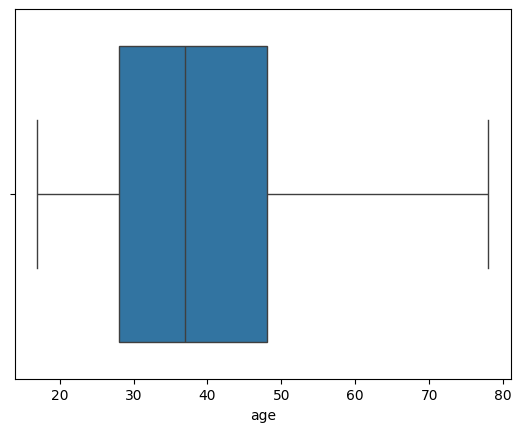

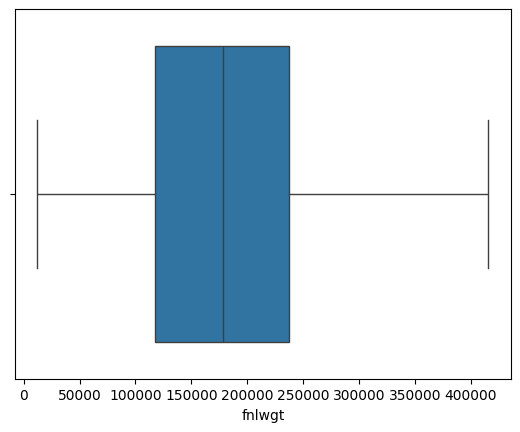

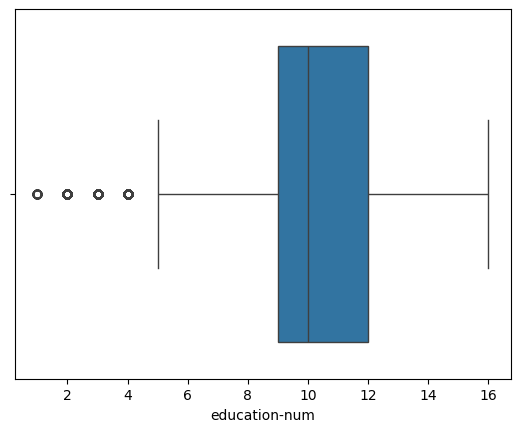

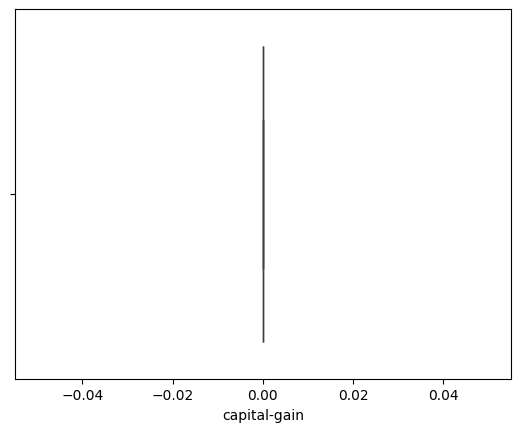

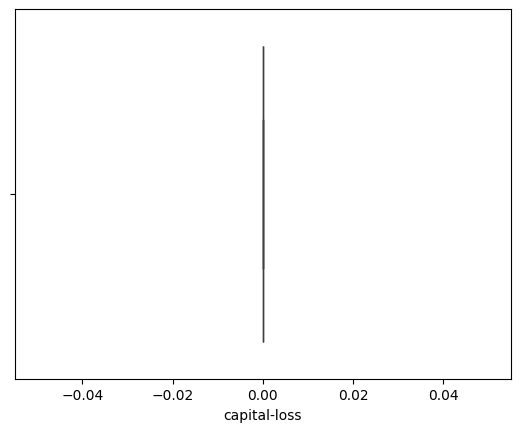

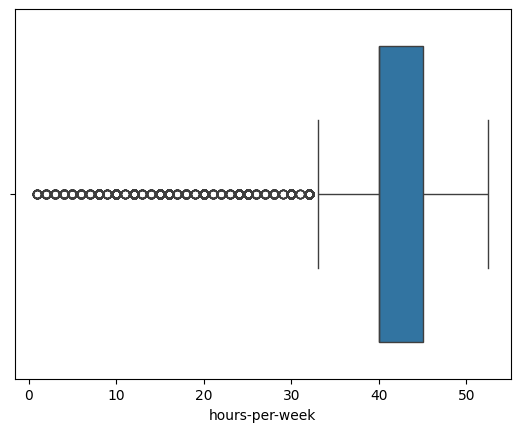

In [45]:
for i in numerical_cols:
  sns.boxplot(data=numerical_cols,x=i)
  plt.show()

## remove the Outliers

In [46]:
# remove the outliars with wisler
def wisker(col):
    q1=numerical_cols[col].quantile(0.25)
    q3=numerical_cols[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    return lower,upper


In [47]:
for i in numerical_cols:
  lower,upper=wisker(i)
  numerical_cols[i]=np.where(numerical_cols[i]<lower,lower,df[i])
  numerical_cols[i]=np.where(numerical_cols[i]>upper,upper,df[i])

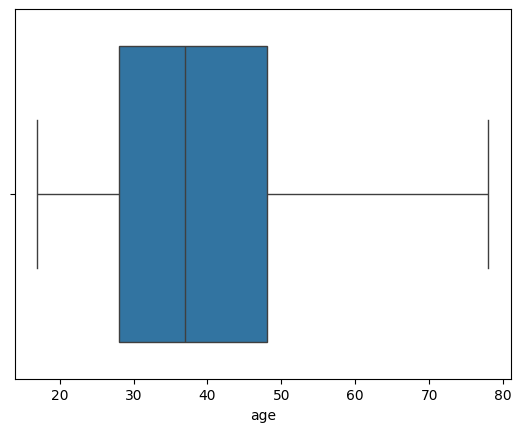

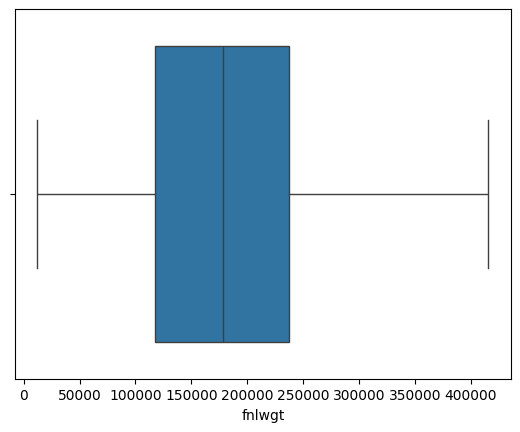

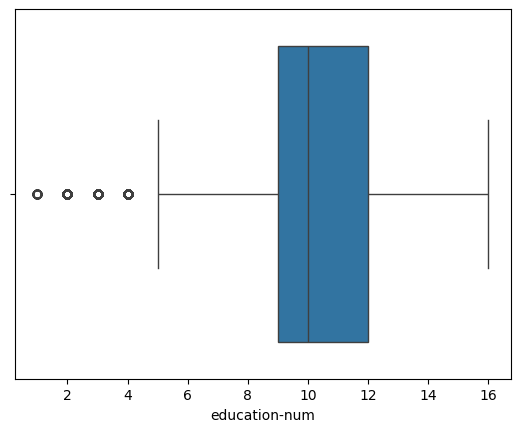

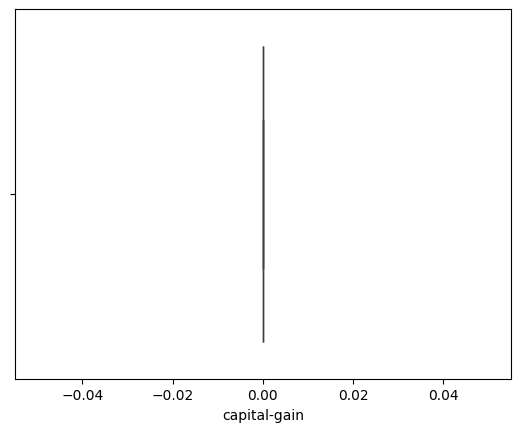

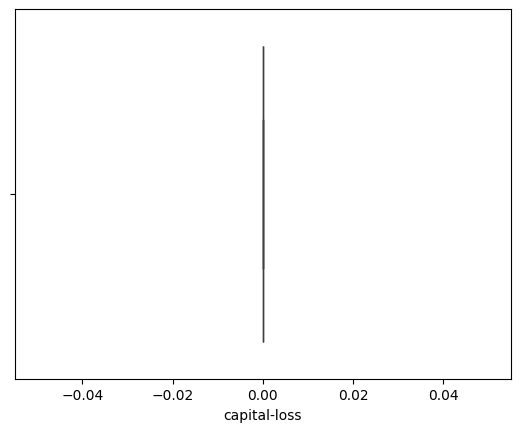

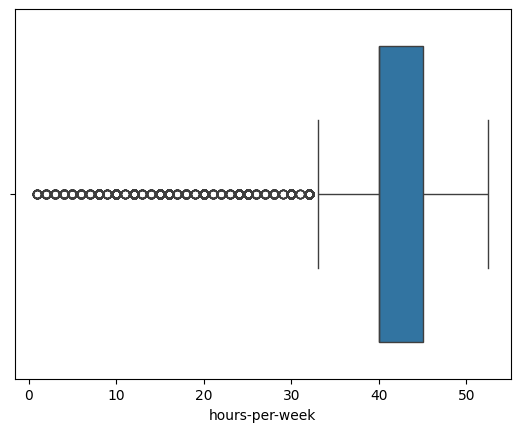

In [48]:
for i in numerical_cols:
    sns.boxplot(data=numerical_cols,x=i)
    plt.show()

## Scaling

In [49]:
# scaling the numerical variable
from sklearn.preprocessing import StandardScaler
# Now apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_cols)

In [68]:
scaled_data

array([[ 0.03278248, -1.14911372,  1.14737534,  0.        ,  0.        ,
         0.07253566],
       [ 0.84423596, -1.08819591,  1.14737534,  0.        ,  0.        ,
        -2.62499012],
       [-0.04098602,  0.30292733, -0.42480361,  0.        ,  0.        ,
         0.07253566],
       ...,
       [ 1.43438395, -0.36707404, -0.42480361,  0.        ,  0.        ,
         0.07253566],
       [-1.221282  ,  0.15411756, -0.42480361,  0.        ,  0.        ,
        -1.92563158],
       [ 0.99177296,  1.06275488, -0.42480361,  0.        ,  0.        ,
         0.07253566]])

In [50]:
categorical_cols

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Husband,White,Male,United-States,<=50K


## DO The label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
categorical_encode=categorical_cols.apply(label.fit_transform)
categorical_encode.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,4,2,0,5,0


## Concat the Numerical & categorical

In [73]:
df1=pd.concat([numerical_cols,categorical_encode],axis=1)
df1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,39.0,77516.0,13.0,0.0,0.0,40.0,7,9,4,1,1,4,1,39,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,6,9,2,4,0,4,1,39,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,4,11,0,6,1,4,1,39,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,4,1,2,6,0,2,1,39,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,4,9,2,10,4,2,0,5,0


## Future Selection

In [75]:
x=df1.drop(['salary'],axis=1)
y=df1['salary']

In [76]:
# # Identify columns with float
# float_columns = df.select_dtypes(include=['float']).columns

# # Convert float values to integers by truncating the decimal part
# df[float_columns] = df[float_columns].astype(int)

# # Display the first few rows of the modified dataset
# print(df.head())

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
x_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
15282,36.0,174308.0,7.0,0.0,0.0,40.0,4,1,0,14,1,4,1,39
24870,35.0,198202.0,9.0,0.0,0.0,52.5,4,11,4,4,1,4,0,39
18822,38.0,52963.0,13.0,0.0,0.0,50.0,4,9,4,1,1,4,0,39
26404,50.0,138270.0,9.0,0.0,0.0,40.0,4,11,2,12,4,2,0,39
7842,68.0,116903.0,11.0,0.0,0.0,40.0,6,8,2,10,0,4,1,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43.0,33331.0,14.0,0.0,0.0,40.0,2,12,2,4,0,4,1,39
19648,44.0,98466.0,6.0,0.0,0.0,35.0,4,0,4,5,3,4,1,39
9845,23.0,45317.0,10.0,0.0,0.0,40.0,4,15,5,12,0,4,0,39
10799,45.0,215862.0,10.0,0.0,0.0,45.0,2,10,2,4,0,4,1,39


In [79]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 26048 entries, 15282 to 2732
Series name: salary
Non-Null Count  Dtype
--------------  -----
26048 non-null  int64
dtypes: int64(1)
memory usage: 407.0 KB


In [80]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

## Coefficient

In [81]:
lr.coef_


array([[-1.11442802e-09, -5.25648219e-06, -2.83241976e-10,
         0.00000000e+00,  0.00000000e+00, -1.28317581e-09,
        -1.67972638e-10, -4.18633787e-10, -1.93177530e-10,
        -2.33664335e-10, -7.22609373e-11, -1.59183724e-10,
        -6.85322459e-12, -1.71549442e-09]])

## Check intercept

In [82]:
lr.intercept_

array([-4.72060083e-11])

## Predicted

In [83]:
y_pred=lr.predict(x_test)

## from sklearn  Import Librabies

## Check Mean Squear Error(MSE)

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

0.24489482573314908

## Accuracy

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7551051742668509